In [1]:
import pandas as pd 
df=pd.read_csv('dataset.csv')
df.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,0.00,NaN,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,0.00,NaN,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,0.00,NaN,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,0.01,NaN,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1.61,NaN,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN


In [2]:
# Target feature is PRCP , Replacing the values in it 
df.loc[df['PRCP']>0, 'PRCP'] = 1
df.head()
    

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,0.0,NaN,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,0.0,NaN,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,0.0,NaN,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,1.0,NaN,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1.0,NaN,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN


In [3]:
import matplotlib.pyplot as plt

<AxesSubplot:>

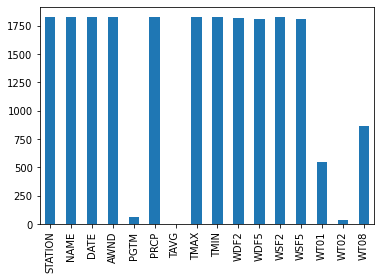

In [4]:
df.count().plot(kind='bar')

<AxesSubplot:>

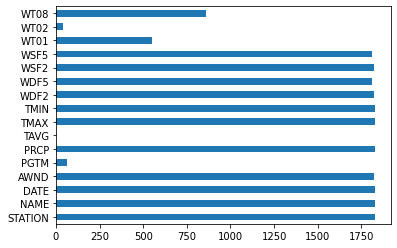

In [5]:
df.count().plot(kind='barh')

In [6]:
df=df.drop(columns=["WT02"])
df=df.drop(columns=["TAVG"])
df=df.drop(columns=["PGTM"])

In [7]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

<AxesSubplot:>

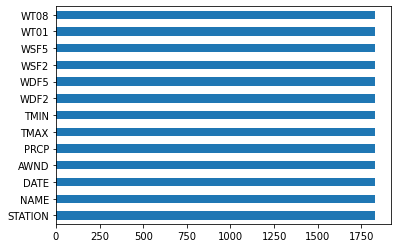

In [8]:
df.count().plot(kind='barh')

In [9]:
df.head()

,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,0.0,64,43,10.0,30.0,8.1,11.0,1.0,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,0.0,65,47,270.0,30.0,6.0,8.9,1.0,1.0
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,0.0,62,44,150.0,150.0,10.1,14.1,1.0,1.0
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,1.0,69,55,270.0,280.0,8.1,14.1,1.0,1.0
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,1.0,59,49,140.0,140.0,10.1,16.1,1.0,1.0


In [10]:
df.to_csv("new_dataset.csv")

In [11]:
df.head()


,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,0.0,64,43,10.0,30.0,8.1,11.0,1.0,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,0.0,65,47,270.0,30.0,6.0,8.9,1.0,1.0
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,0.0,62,44,150.0,150.0,10.1,14.1,1.0,1.0
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,1.0,69,55,270.0,280.0,8.1,14.1,1.0,1.0
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,1.0,59,49,140.0,140.0,10.1,16.1,1.0,1.0


In [12]:
from sklearn import preprocessing

In [13]:
min_max_scaler=preprocessing.MinMaxScaler()

In [14]:
x_scaled = min_max_scaler.fit_transform(df[['AWND','TMAX','TMIN','WDF2','WDF5','WSF2','WSF5','WT01','WT08']])
df_normalized=pd.DataFrame()
df_normalized[['AWND','TMAX','TMIN','WDF2','WDF5','WSF2','WSF5','WT01','WT08']] = pd.DataFrame(x_scaled)


In [15]:
df=df.drop(columns=['AWND','TMAX','TMIN','WDF2','WDF5','WSF2','WSF5','WT01','WT08'])


In [16]:
df.insert(0, 'New_ID', range(0,len(df)))
df_normalized.insert(0, 'New_ID', range(0,len(df_normalized)))

In [17]:
df['New_ID']=df['New_ID'].astype(str)
df_normalized['New_ID']=df_normalized['New_ID'].astype(str)

In [18]:
df_norm=pd.merge(df,df_normalized,how='inner',on='New_ID')

In [19]:
df_norm.head()


,New_ID,STATION,NAME,DATE,PRCP,AWND,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT08
0,0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,0.0,0.305590,0.203390,0.121951,0.000000,0.057143,0.287293,0.178571,0.0,0.0
1,1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,0.0,0.249689,0.220339,0.219512,0.742857,0.057143,0.171271,0.103571,0.0,0.0
2,2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.0,0.083230,0.169492,0.146341,0.400000,0.400000,0.397790,0.289286,0.0,0.0
3,3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.0,0.166460,0.288136,0.414634,0.742857,0.771429,0.287293,0.289286,0.0,0.0
4,4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,1.0,0.305590,0.118644,0.268293,0.371429,0.371429,0.397790,0.360714,0.0,0.0


In [20]:
df_norm=df_norm.drop(columns='New_ID')
df_norm=df_norm.drop(columns='STATION')
df_norm=df_norm.drop(columns='NAME')


In [21]:
df_norm

,DATE,PRCP,AWND,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT08
0,2016-01-01,0.0,0.305590,0.203390,0.121951,0.000000,0.057143,0.287293,0.178571,0.0,0.0
1,2016-01-02,0.0,0.249689,0.220339,0.219512,0.742857,0.057143,0.171271,0.103571,0.0,0.0
2,2016-01-03,0.0,0.083230,0.169492,0.146341,0.400000,0.400000,0.397790,0.289286,0.0,0.0
3,2016-01-04,1.0,0.166460,0.288136,0.414634,0.742857,0.771429,0.287293,0.289286,0.0,0.0
4,2016-01-05,1.0,0.305590,0.118644,0.268293,0.371429,0.371429,0.397790,0.360714,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1822,2020-12-27,1.0,0.139130,0.237288,0.414634,0.742857,0.714286,0.331492,0.432143,0.0,0.0
1823,2020-12-28,1.0,0.583851,0.067797,0.219512,0.228571,0.714286,0.618785,0.535714,0.0,0.0
1824,2020-12-29,0.0,0.195031,0.220339,0.097561,0.942857,1.000000,0.397790,0.432143,0.0,0.0
1825,2020-12-30,0.0,0.055901,0.288136,0.146341,0.714286,0.714286,0.220994,0.217857,0.0,0.0


In [22]:
#CHI-SQUARE TEST
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


In [23]:
label_encoder = LabelEncoder()
df_norm['DATE'] = label_encoder.fit_transform(df_norm['DATE'])

In [24]:
X = df_norm.drop('PRCP',axis=1)
y = df_norm['PRCP']

In [25]:
chi_scores = chi2(X,y)

In [26]:
chi_scores

(array([845.54850795,   9.82099324,  16.84804817,   3.80477649,
          6.87066953,   5.4348588 ,   2.61564869,   5.04941346,
                 nan,          nan]),
 array([6.75045568e-186, 1.72531145e-003, 4.04949539e-005, 5.11065964e-002,
        8.76218182e-003, 1.97386864e-002, 1.05814246e-001, 2.46342760e-002,
                    nan,             nan]))

In [27]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

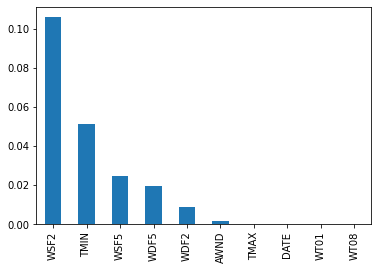

In [28]:
p_values.plot.bar()# since WSF2 is higher the p_value means this variable is independent of the respnse , hence should be droped)

In [29]:
df_norm=df_norm.drop(columns='WSF2')
df_norm=df_norm.drop(columns='TMIN')
df_norm=df_norm.drop(columns='WSF5')
df_norm=df_norm.drop(columns='WDF5')
df_norm=df_norm.drop(columns='DATE')


In [30]:
df_norm

,PRCP,AWND,TMAX,WDF2,WT01,WT08
0,0.0,0.305590,0.203390,0.000000,0.0,0.0
1,0.0,0.249689,0.220339,0.742857,0.0,0.0
2,0.0,0.083230,0.169492,0.400000,0.0,0.0
3,1.0,0.166460,0.288136,0.742857,0.0,0.0
4,1.0,0.305590,0.118644,0.371429,0.0,0.0
...,...,...,...,...,...,...
1822,1.0,0.139130,0.237288,0.742857,0.0,0.0
1823,1.0,0.583851,0.067797,0.228571,0.0,0.0
1824,0.0,0.195031,0.220339,0.942857,0.0,0.0
1825,0.0,0.055901,0.288136,0.714286,0.0,0.0


In [31]:
# slpiliting the data in train and test 

In [32]:
from sklearn.model_selection import train_test_split
y = df_norm.PRCP.values
X = df_norm.drop('PRCP', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

In [33]:
X_test

,AWND,TMAX,WDF2,WT01,WT08
791,0.388820,0.118644,0.257143,0.0,0.0
1513,0.278261,0.237288,0.714286,0.0,0.0
56,0.195031,0.457627,0.771429,0.0,0.0
1785,0.055901,0.389831,0.742857,0.0,0.0
522,0.139130,0.355932,0.714286,0.0,0.0
...,...,...,...,...,...
1100,0.472050,0.101695,0.228571,0.0,0.0
1292,0.195031,0.559322,0.714286,0.0,0.0
926,0.166460,0.593220,0.742857,0.0,0.0
374,0.278261,0.203390,0.257143,0.0,0.0


In [34]:
#Logistic regressoion 

In [35]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred_logistic=model.predict(X_test)
y_pred_logistic

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

 ### We got the accuracy 

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_logistic) 

0.9344262295081968

####Confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_logistic)

print(cf_matrix)

[[333   3]
 [ 21   9]]


In [39]:
True_positive=17
True_negative=328
False_positive=8
False_negative=13

####Precision

In [40]:
precision=True_positive/(True_positive+False_positive)
precision

0.68

In [41]:
#recall
recall=True_positive/(True_positive+False_negative)
recall

0.5666666666666667

In [42]:
#F1
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.6181818181818183

In [43]:
# Adjust threshold for minimum false negative
def predict_threshold (model,X_test,thresholds):
    import numpy as np
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0) 

In [44]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):
    y_predict = predict_threshold(model,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[  0 336]
 [  0  30]]
Threshold : 0.1
[[276  60]
 [  7  23]]
Threshold : 0.2
[[313  23]
 [ 11  19]]
Threshold : 0.30000000000000004
[[324  12]
 [ 16  14]]
Threshold : 0.4
[[329   7]
 [ 20  10]]
Threshold : 0.5
[[333   3]
 [ 21   9]]
Threshold : 0.6000000000000001
[[336   0]
 [ 21   9]]
Threshold : 0.7000000000000001
[[336   0]
 [ 23   7]]
Threshold : 0.8
[[336   0]
 [ 27   3]]
Threshold : 0.9
[[336   0]
 [ 29   1]]


In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

In [46]:
tpr,fpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
thresholds

array([1.90168445, 0.90168445, 0.65274616, 0.45511394, 0.4367073 ,
       0.40759836, 0.38619096, 0.37143157, 0.36868573, 0.35887173,
       0.31894266, 0.30610731, 0.30056065, 0.29076133, 0.27310257,
       0.26704345, 0.26148778, 0.25808345, 0.24637733, 0.20516979,
       0.19858944, 0.18454731, 0.17967439, 0.14640623, 0.14451068,
       0.14039848, 0.13532417, 0.13510737, 0.1270398 , 0.1268404 ,
       0.11985846, 0.11806582, 0.10001799, 0.09985122, 0.09951843,
       0.09728503, 0.09403657, 0.08979968, 0.08841145, 0.08772964,
       0.08651679, 0.08389303, 0.08375065, 0.08334293, 0.08094473,
       0.08080691, 0.0806693 , 0.07943241, 0.07940991, 0.07769171,
       0.06381207, 0.06290708, 0.05518941, 0.05457842, 0.05448283,
       0.05069174, 0.0505136 , 0.04767256, 0.04742067, 0.04697436,
       0.04533959, 0.04525941, 0.04390458, 0.04382681, 0.04174573,
       0.04052841, 0.03772828, 0.03759389, 0.0366217 , 0.03633802,
       0.03545237, 0.03505178, 0.0314091 , 0.03113545, 0.02929

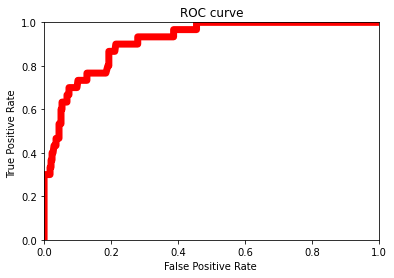

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.plot(fpr, tpr,color='red',lw=7)
plt.show()

###ROC_AUC score

In [48]:

roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.911656746031746

create knn classifier model


In [49]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors, metrics



In [50]:
X = df_norm.drop('PRCP',axis=1)
y = df_norm['PRCP']

In [51]:
print(X,y)

          AWND      TMAX      WDF2  WT01  WT08
0     0.305590  0.203390  0.000000   0.0   0.0
1     0.249689  0.220339  0.742857   0.0   0.0
2     0.083230  0.169492  0.400000   0.0   0.0
3     0.166460  0.288136  0.742857   0.0   0.0
4     0.305590  0.118644  0.371429   0.0   0.0
...        ...       ...       ...   ...   ...
1822  0.139130  0.237288  0.742857   0.0   0.0
1823  0.583851  0.067797  0.228571   0.0   0.0
1824  0.195031  0.220339  0.942857   0.0   0.0
1825  0.055901  0.288136  0.714286   0.0   0.0
1826  0.195031  0.305085  0.971429   0.0   0.0

[1827 rows x 5 columns] 0       0.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
1822    1.0
1823    1.0
1824    0.0
1825    0.0
1826    0.0
Name: PRCP, Length: 1827, dtype: float64


In [52]:
knn=neighbors.KNeighborsClassifier(n_neighbors=25,weights="uniform")
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

In [53]:
#train the model 
knn.fit(X_train,y_train)
prediction=knn.predict(X_test)
accuracy=metrics.accuracy_score(y_test,prediction)
print('predictions:',prediction)
print('accuracy:',accuracy)

predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [54]:
a=1328

print('actual value:',y[a])
print('predicated value:',knn.predict(X)[a])

actual value: 0.0
predicated value: 0.0


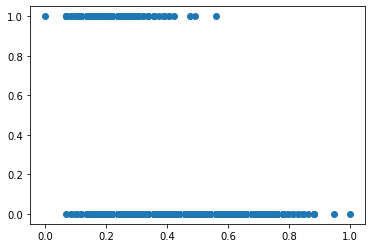

In [55]:
plt.scatter(X['TMAX'],y)
plt.show()

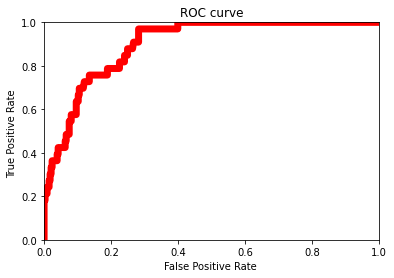

In [56]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.plot(fpr, tpr,color='red',lw=7)
plt.show()

In [57]:
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.8994448994448994